# bibliotecas e variáveis globais


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import plotly.express as px

'''
Features: desenvolver uma visualização dos dados a partir da idade, trabalho, educação e estado civil

'''

dic_columns = {
    'age': 'idade',
    'job': 'trabalho',
    'marital': 'estado civil',
    'education': 'formação',
    'default': 'inadimplência',
    'housing': 'residência própria',
    'loan': 'empréstimo',
    'balance': 'saldo',
    'contact': 'contato campanha',#modo de entrar em contato com cliente
    'month': 'mês de contato',
    'day': 'dia do contato',
    'duration': 'duração de contato',
    'campaign': 'número contatos na campanha',          
    'pdays': 'dias anteriores ao contato', #numeric; 999 means client was not previously contacted
    'previous': 'numero contatos anterior',  
    'poutcome': 'sucesso ao contato anterior',
    'deposit': 'depósito'
}
jobs = {  
    'admin.': 'administrador',
    'technician':'técnico',
    'services': 'serviços',
    'management' : 'gerência',
    'retired' : 'aposentado',
    'blue-collar': 'operário',
    'unemployed':'desempregado',
    'entrepreneur' :'empreendedor',
    'housemaid':'empregado doméstico',
    'unknown': 'desconhecido',
    'self-employed': 'trabalhador autônomo',
    'student': 'estudante' 
}

estado_civil = {
    'married': 'casado(a)', 'single': 'solteiro(a)', 'divorced':'divorciado(a)'
}
formacao ={'secondary':'ensino médio', 'tertiary':'ensino superior', 'primary':'primário', 'unknown':'indefinido'}

# Visualização dos dados

In [35]:
df = pd.read_csv('../Data/bank.csv')
#df.rename(columns=dic_columns,inplace=True)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [36]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


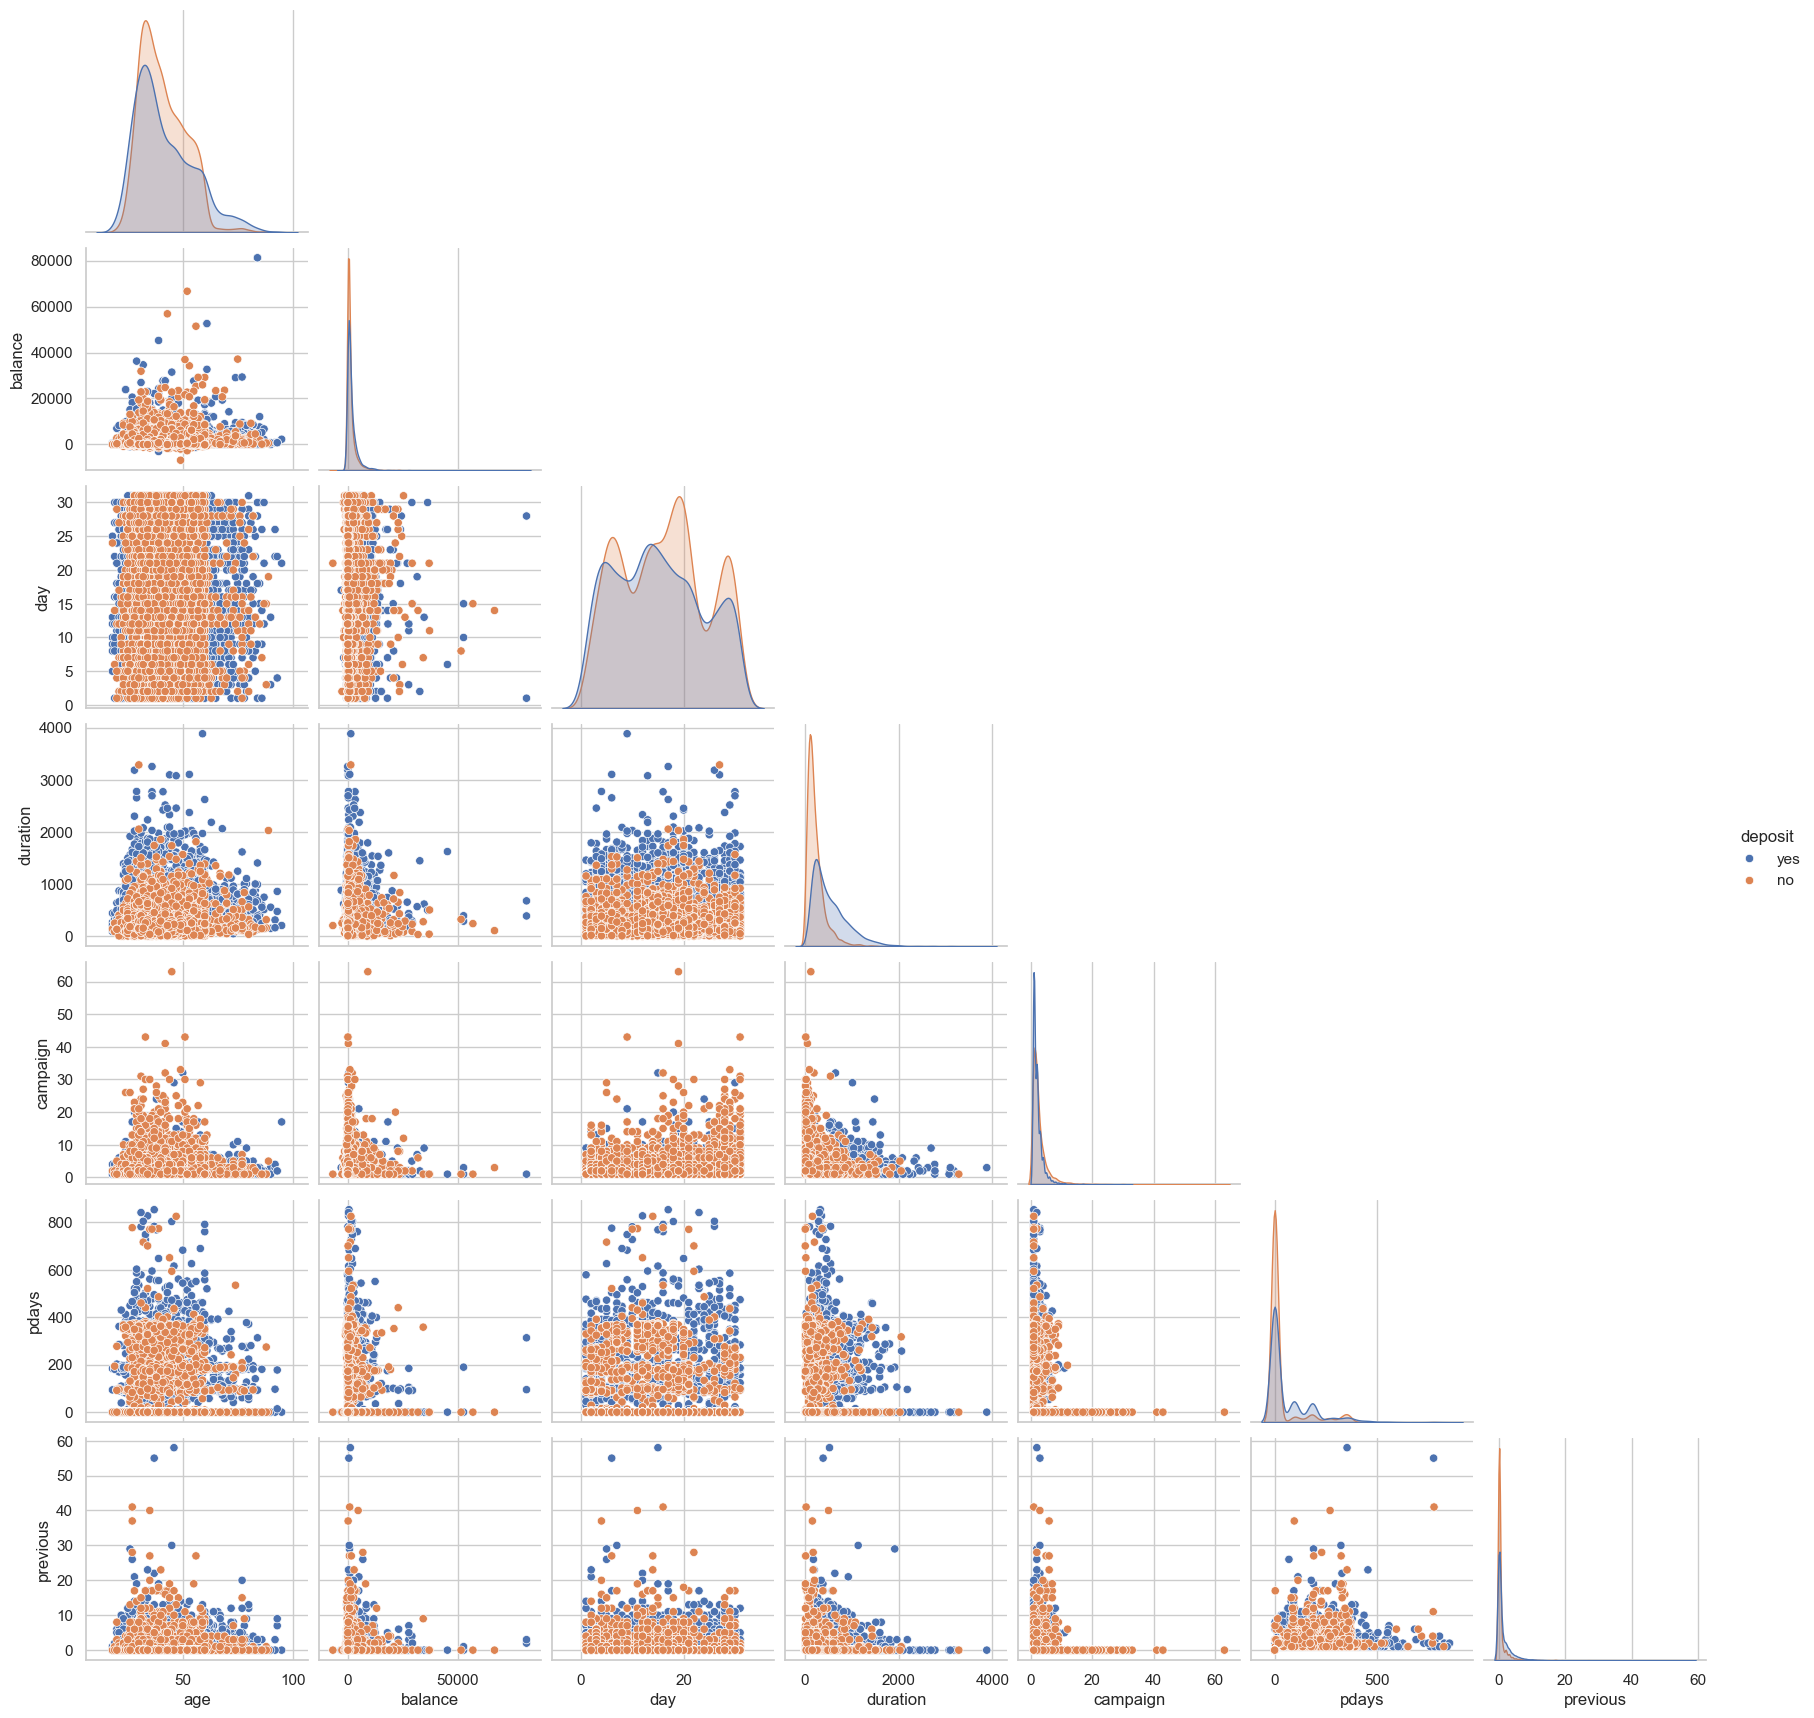

In [37]:
sns.pairplot(df,hue='deposit',corner=True)

C:\Users\joule\AppData\Local\Temp\ipykernel_3740\3411526269.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



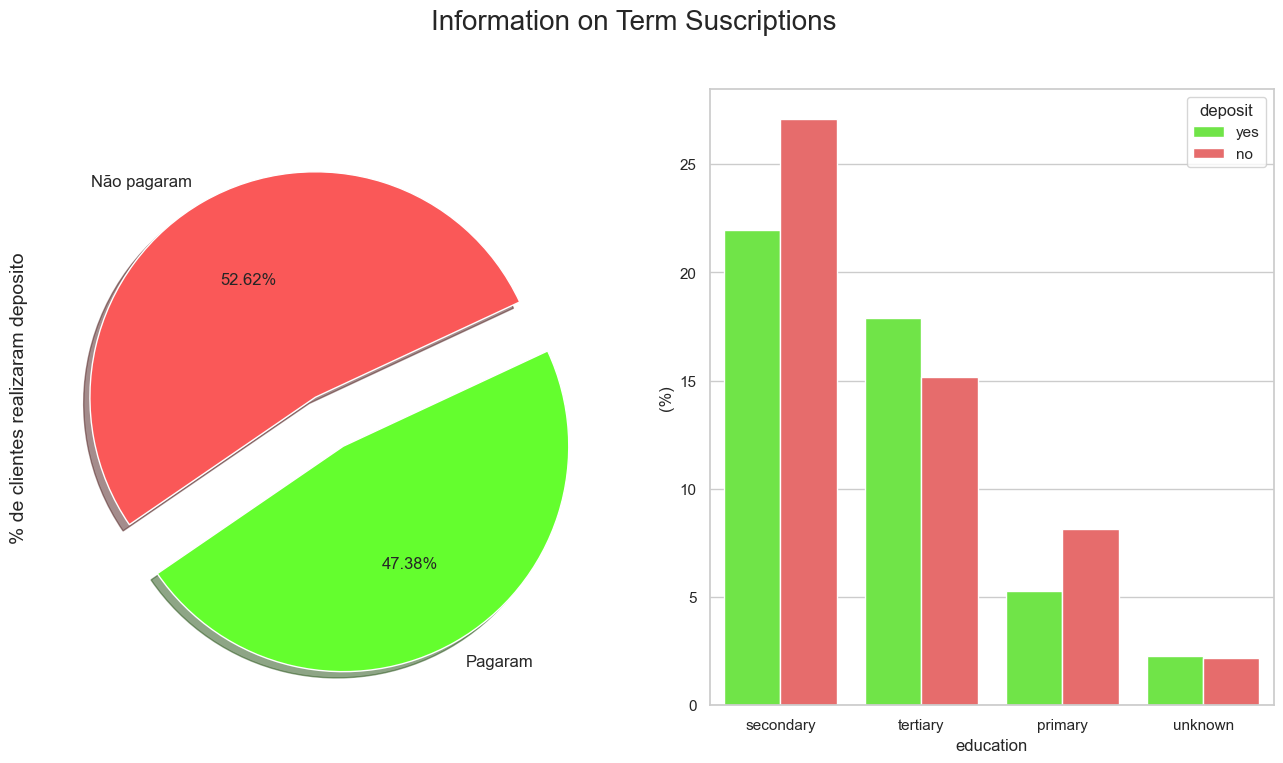

In [38]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Não pagaram", "Pagaram"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% de clientes realizaram deposito', fontsize=14)

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

In [39]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=8,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [40]:
management = df[df.job=='management']
fig = px.box(management, x="marital", y="balance", 
             color="deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Management behevior on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=18,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

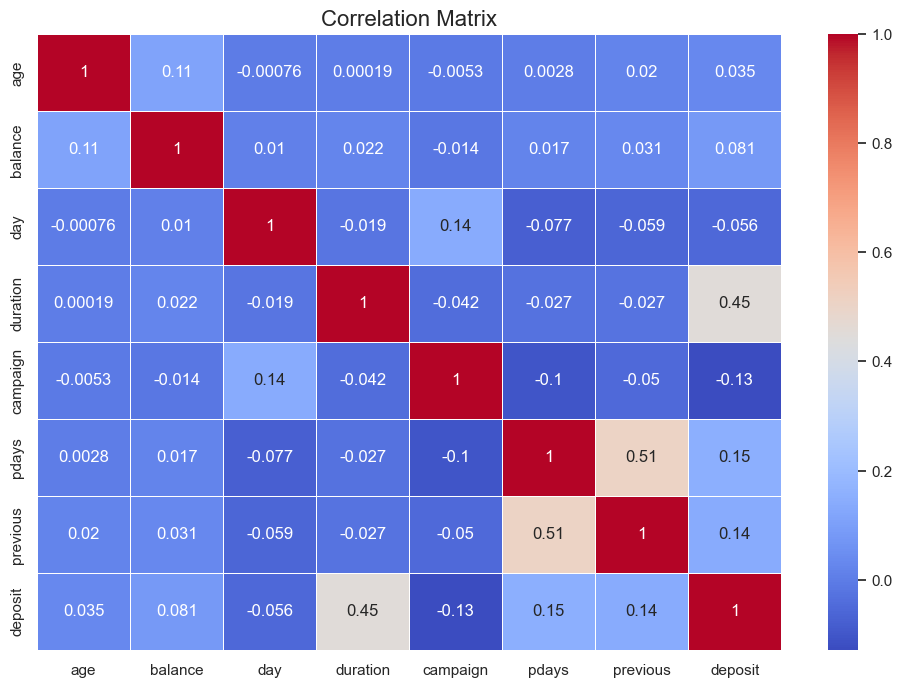

In [41]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits


fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, annot=True, linewidths=.6,cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [42]:
fig = px.scatter(df, x="balance", y="duration", color="marital", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.update_layout(
    title={
         'text': "Purpose Of Low Amount Of Balance.",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Duration",
    yaxis_title=" Balance",
    legend_title="Marital Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

C:\Users\joule\AppData\Local\Temp\ipykernel_3740\1879032717.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'below_average' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



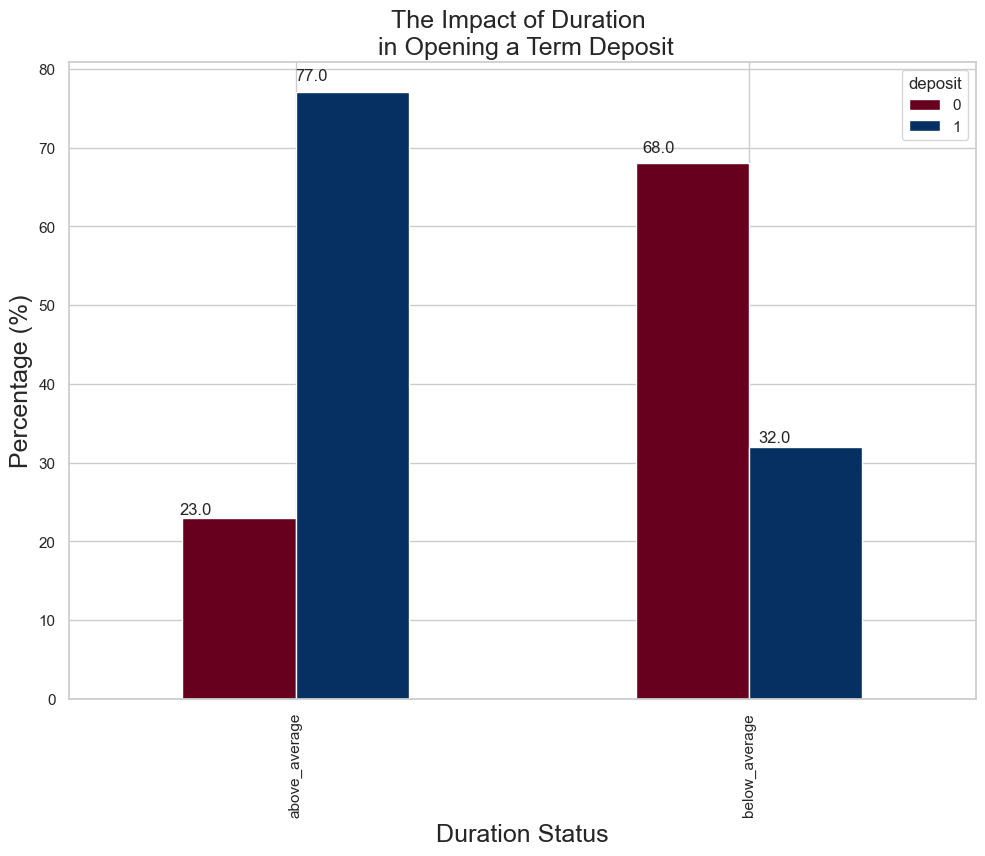

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

# Pre processamento

In [44]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,duration_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,above_average
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,above_average
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,above_average
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,above_average
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,above_average


## Label encoder

In [45]:
le = LabelEncoder()
df.marital = le.fit_transform(df.marital)
df.housing = le.fit_transform(df.housing)
df.deposit = le.fit_transform(df.deposit)
df.loan = le.fit_transform(df.loan)
df.default = le.fit_transform(df.default)
df.duration_status = le.fit_transform(df.duration_status)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,duration_status
0,59,admin.,1,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0
1,56,admin.,1,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,0
2,41,technician,1,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,0
3,55,services,1,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,0
4,54,admin.,1,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,2,primary,0,1,1,0,cellular,20,apr,257,1,-1,0,unknown,0,1
11158,39,services,1,secondary,0,733,0,0,unknown,16,jun,83,4,-1,0,unknown,0,1
11159,32,technician,2,secondary,0,29,0,0,cellular,19,aug,156,2,-1,0,unknown,0,1
11160,43,technician,1,secondary,0,0,0,1,cellular,8,may,9,2,172,5,failure,0,1


## One hote enconder


In [46]:
# Criando o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Selecionando apenas as colunas categóricas para codificação
categorical_cols = ['job', 'marital','education', 'contact', 'month', 'campaign','poutcome']
encoded_data = encoder.fit_transform(df[categorical_cols])

# Criando um DataFrame com as novas colunas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenando os dados originais com os dados codificados
df_final = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df_final

,age,default,balance,housing,loan,day,duration,pdays,previous,deposit,...,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,0,45,0,0,5,1467,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,0,1270,1,0,5,1389,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,0,2476,1,0,5,579,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,0,184,0,0,5,673,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,39,0,733,0,0,16,83,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,32,0,29,0,0,19,156,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,43,0,0,0,1,8,9,172,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [47]:
scaler = MinMaxScaler(feature_range=(-1, 1))

# Selecionando a coluna que será normalizada
df_final['age'] = scaler.fit_transform(df_final[['age']])
df_final['balance'] = scaler.fit_transform(df_final[['balance']])
df_final['day'] = scaler.fit_transform(df_final[['day']])
df_final['duration'] = scaler.fit_transform(df_final[['duration']])
df_final['pdays'] = scaler.fit_transform(df_final[['pdays']])

df_final

,age,default,balance,housing,loan,day,duration,pdays,previous,deposit,...,campaign_31,campaign_32,campaign_33,campaign_41,campaign_43,campaign_63,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.064935,0,-0.791257,1,0,-0.733333,-0.463779,-1.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.012987,0,-0.843454,0,0,-0.733333,-0.244651,-1.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.402597,0,-0.815630,1,0,-0.733333,-0.284867,-1.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.038961,0,-0.788236,1,0,-0.733333,-0.702501,-1.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.064935,0,-0.840297,0,0,-0.733333,-0.654035,-1.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.610390,0,-0.844454,1,0,0.266667,-0.868523,-1.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.454545,0,-0.827827,0,0,0.000000,-0.958237,-1.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.636364,0,-0.843818,0,0,0.200000,-0.920598,-1.000000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,-0.350649,0,-0.844476,0,1,-0.533333,-0.996391,-0.595322,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   default              11162 non-null  int32  
 2   balance              11162 non-null  float64
 3   housing              11162 non-null  int32  
 4   loan                 11162 non-null  int32  
 5   day                  11162 non-null  float64
 6   duration             11162 non-null  float64
 7   pdays                11162 non-null  float64
 8   previous             11162 non-null  int64  
 9   deposit              11162 non-null  int64  
 10  duration_status      11162 non-null  int32  
 11  job_admin.           11162 non-null  float64
 12  job_blue-collar      11162 non-null  float64
 13  job_entrepreneur     11162 non-null  float64
 14  job_housemaid        11162 non-null  float64
 15  job_management       11162 non-null 

# Treinamento e arquitetura do modelo


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

def evaluate_model_visual(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    
    # Calcular a precisão (accuracy)
    accuracy = accuracy_score(y_test, y_pred)


    conf_matrix = confusion_matrix(y_test, y_pred)
    f, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.title(f'Confusion Matrix/Acurácia: {accuracy:.2f} ', fontsize=20)
    plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
    ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels("")
    ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
    plt.show()
    
    return accuracy

### Random Forest

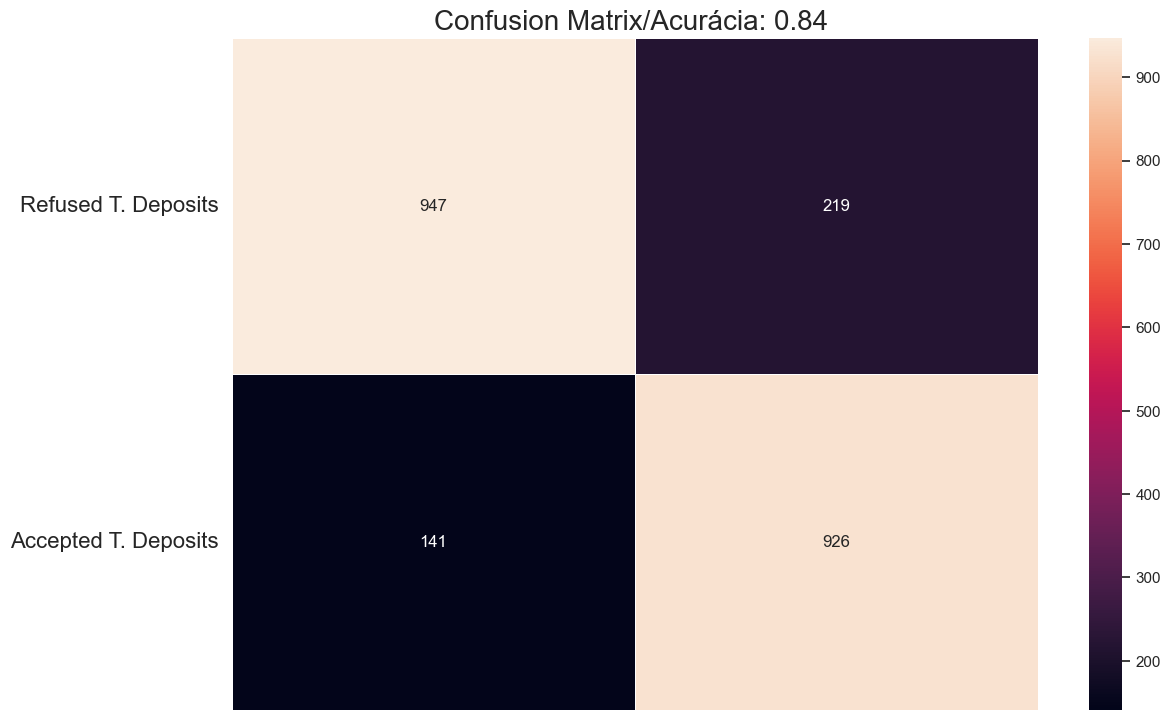

0.838781907747425

In [67]:
df_copy = df_final.copy()

y = df_copy['deposit']
X = df_copy.drop(columns='deposit')

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestClassifier(n_estimators=80)
model.fit(X_train, y_train)

# Fazendo previsões
evaluate_model_visual(model, X_test, y_test)

### Redes Neurais


Epoch 1/10


c:\Users\joule\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6483 - loss: 0.6245 - val_accuracy: 0.7990 - val_loss: 0.4480
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8083 - loss: 0.4208 - val_accuracy: 0.8231 - val_loss: 0.4124
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8300 - loss: 0.3946 - val_accuracy: 0.8219 - val_loss: 0.4013
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8314 - loss: 0.3808 - val_accuracy: 0.8320 - val_loss: 0.4125
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8402 - loss: 0.3696 - val_accuracy: 0.8219 - val_loss: 0.3933
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8489 - loss: 0.3537 - val_accuracy: 0.8337 - val_loss: 0.3839
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - loss: 0.3572 - val_accuracy: 0.8376 - val_loss: 0.3823
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8557 - loss: 0.3434 - val_accuracy: 0.8393 - val_

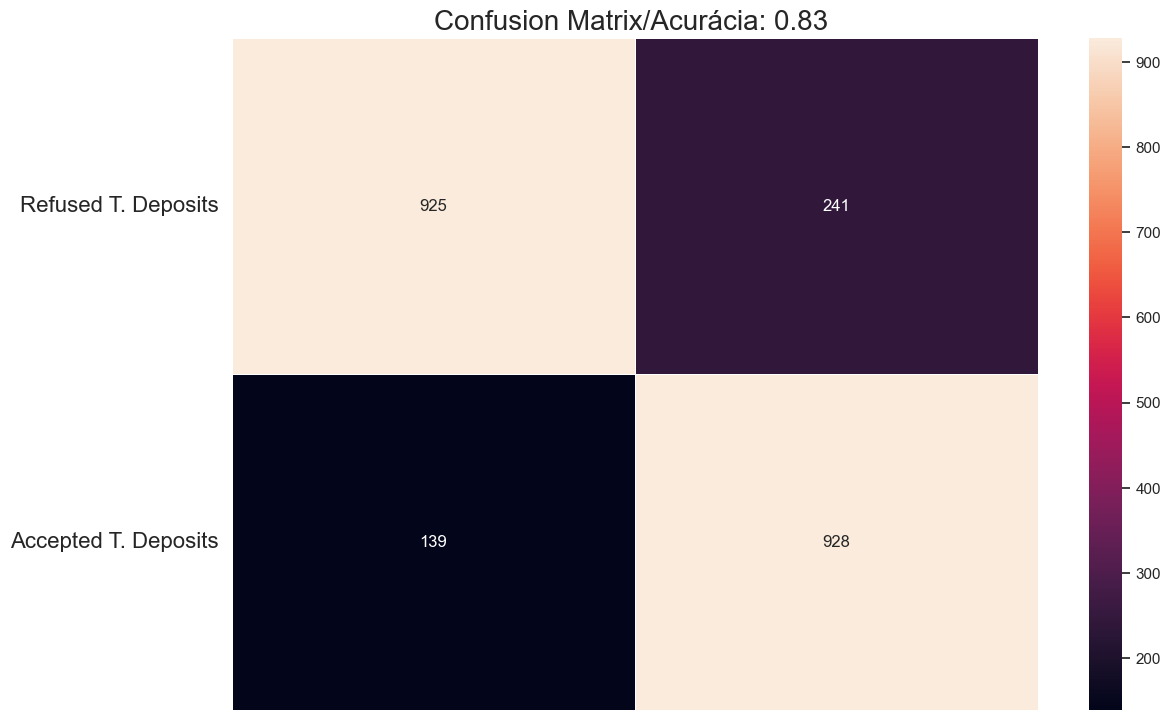

0.8298253470667264

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

    Dense(32, activation='relu'),

    Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



evaluate_model_visual(model, X_test, y_test)


### Naive Bayes

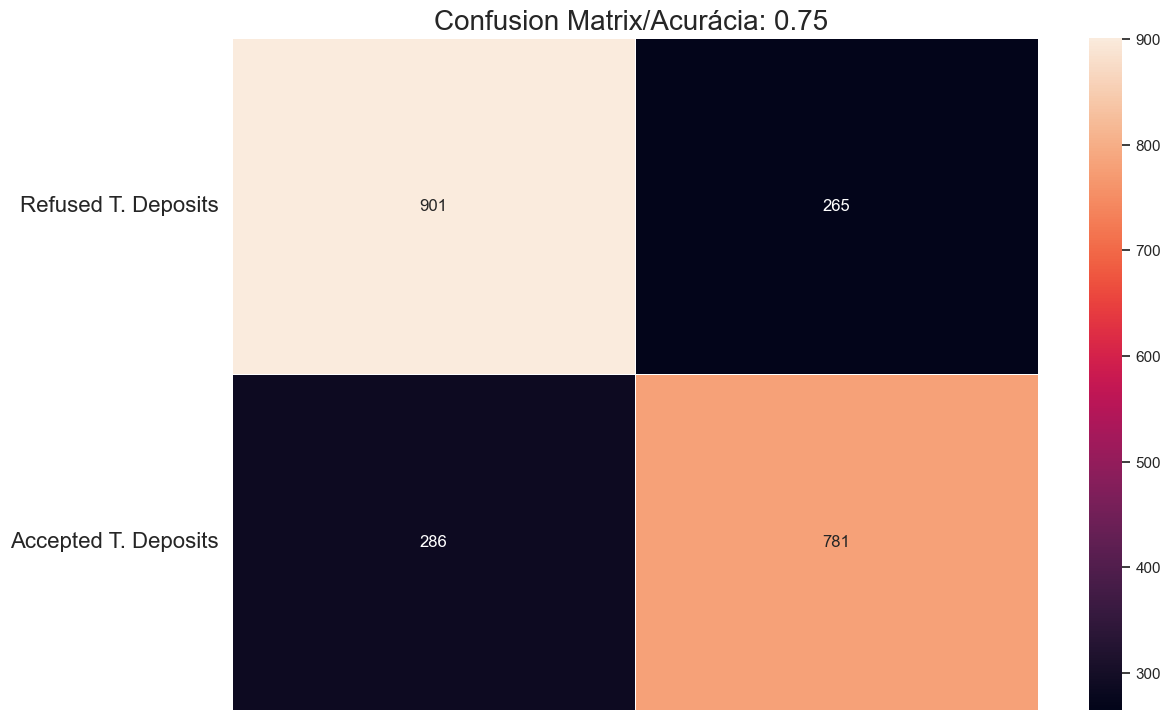

0.7532467532467533

In [68]:
from sklearn.naive_bayes import BernoulliNB

modelo = BernoulliNB()

# Treinando o modelo
modelo.fit(X_train, y_train)


evaluate_model_visual(modelo, X_test, y_test)